<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/AssNo04Q02(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#Correlation

In [5]:
data.corr()
# strong +ve relationship

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#Fitting Linear Regression Model

In [6]:
import statsmodels.formula.api as smf

model = smf.ols("Salary~YearsExperience", data=data).fit()

In [7]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

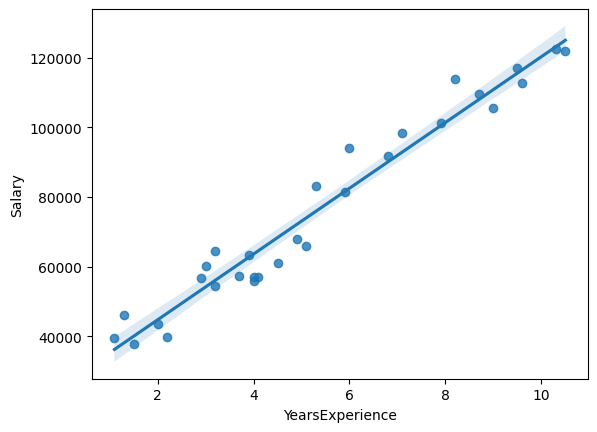

In [8]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [9]:
# Coefficients are B0=Intercept and B1=Sorting_Time
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
print("***T Values :***\n",model.tvalues,'\n\n','***P Values :***\n',model.pvalues)
# p value < alpha --> Reject Null Hypothesis

***T Values :***
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 ***P Values :***
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


## Prediction Model

In [23]:
# Predict for sorting time is 21 and 4
newdata = pd.Series([15,10,4,1])
newdata

0    15
1    10
2     4
3     1
dtype: int64

In [24]:
pred_data = pd.DataFrame(newdata,columns=['YearsExperience'])
pred_data

,YearsExperience
0,15
1,10
2,4
3,1


In [25]:
model.predict(pred_data)

0    167541.635020
1    120291.823413
2     63592.049484
3     35242.162520
dtype: float64